## Monte Carlo Helicopter Tour

In [1]:
from option import VanillaOption, call_payoff, put_payoff

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
## Set some data
spot = 41.0
strike = 40.0
rate = 0.08
vol = 0.30
div = 0.0
expiry = 1.0

In [9]:
steps = 252
h = expiry / steps

In [10]:
u = np.exp((rate - div) * h + vol * np.sqrt(h)) 
d = np.exp((rate - div) * h - vol * np.sqrt(h))

In [11]:
pstar = (np.exp(rate * h) - d) / ( u - d)

In [12]:
path = np.zeros(steps)
path[0] = spot

In [15]:
z = np.random.uniform(size=steps)

for i in range(1, steps):
    if z[i] >= pstar:
        path[i] = path[i-1] * u
    else:
        path[i] = path[i-1] * d

In [16]:
path

array([41.        , 40.24522259, 41.02604001, 41.82200646, 41.05209656,
       40.29636009, 41.07816966, 41.8751475 , 41.10425932, 41.90174334,
       42.71469974, 43.54342871, 44.38823625, 45.24943433, 46.12734094,
       47.02228024, 46.15663744, 45.30693043, 46.18595254, 45.33570587,
       44.50111156, 45.36449958, 46.24463862, 45.39331158, 44.5576568 ,
       45.42214189, 46.30339927, 47.20175437, 46.33280759, 47.23173326,
       46.36223459, 45.5087427 , 46.39168028, 45.53764632, 46.42114466,
       47.3217842 , 48.23989749, 47.35183932, 46.48012959, 47.38191352,
       46.50965016, 47.41200683, 46.53918947, 47.44211925, 46.56874754,
       45.71145392, 46.59832439, 45.74048628, 46.62792002, 47.53257131,
       46.65753445, 45.79860633, 46.68716769, 45.82769404, 44.98404262,
       45.85680023, 46.74649064, 45.8859249 , 46.77618038, 45.91506807,
       46.80588897, 45.94422976, 46.83561643, 45.97340996, 45.12707602,
       46.00260869, 46.895128  , 47.80496352, 48.73245121, 49.67

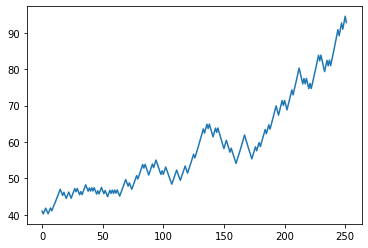

In [17]:
plt.plot(path)

In [23]:
def european_binomial_monte_carlo(option, spot, rate, vol, div, steps=252, reps=1000):
    h = expiry / steps
    u = np.exp((rate - div) * h + vol * np.sqrt(h)) 
    d = np.exp((rate - div) * h - vol * np.sqrt(h))
    z = np.random.uniform(size=steps)
    pstar = (np.exp(rate * h) - d) / ( u - d)
    prc_t = np.zeros(reps)
    path = np.zeros(reps)
    
    for j in range(reps):
        z = np.random.uniform(size=steps)
        path[0] = spot
        for i in range(1, steps):
            if z[i] >= pstar:
                path[i] = path[i-1] * u
            else:
                path[i] = path[i-1] * d
        prc_t[j] = option.payoff(path[-1])
        
    return np.exp(-rate * expiry) * prc_t.mean()
                
    

In [24]:
the_call = VanillaOption(strike, expiry, call_payoff)

In [27]:
call_prc = european_binomial_monte_carlo(the_call, spot, rate, vol, div, reps=100000)

In [28]:
call_prc

9.796469239044502